# Visualization of CAR map
Results calculated in R
Visualizing in Python

In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

In [2]:
#file = '/outputs/presence_only_models/predictors/dataset100x100-puebla-p9/0-pred.csv'
#PDF = read.csv(file)
## REad adjancency matrix
mat_filename = "/outputs/training_data_sample_puebla_p9_abies_pinophyta_adjmat.npy"


TDF = pd.read_csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same

TDF.sort_values(by='cell_ids',inplace=True)

    

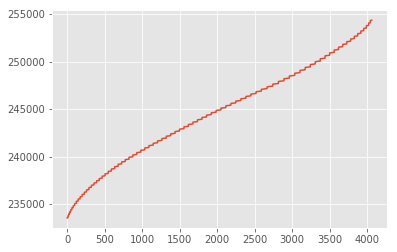

In [3]:
plt.plot(TDF.cell_ids.values)

In [4]:
TDF.shape

(4061, 25)

In [5]:
import utilities.data_extraction as de
nTDF = de.toGeoDataFrame(TDF,xcoord_name='Longitude',ycoord_name='Latitude')

## Extract the polygons from cells


In [ ]:
from mesh.models import initMesh
from django.contrib.gis.geos import Point, Polygon
#coord = -99.76
#coord = 17.55
#xcoord = -98.219
#ycoord = 19.05
xcoord = -97.237
ycoord = 19.482
p = Point(xcoord,ycoord,srid=4326)
radii = np.linspace(0.08,2,10)
polys = map(lambda r : p.buffer(r),radii)
mexmesh = initMesh(11)
## restrict the polygons to the polygon n 3
polys = [polys[9]]
intersected_cells = map(lambda poly : mexmesh.objects.filter(cell__intersects=poly),polys)
# Number of selected cells in each buffer
values = map(lambda l : list(l.values_list('id',flat=True)),intersected_cells)
## Change to network database
from traversals.strategies import idsToCells
cells = map(lambda level : list(idsToCells(level)),values)


import shapely.wkt as wkt



DEBUG Changed MESH TABLE SPACE
INFO Compiling Query and asking the Graph Database


In [ ]:
ids_poly = map(lambda c : (c.id,wkt.loads(c.polygon.wkt)),cells[0])

In [ ]:
import geopandas as gpd
gg = gpd.GeoDataFrame(ids_poly,columns=['id','geom'])
gg.set_geometry('geom',inplace=True)
gg.set_index('id',inplace=True)
plt.rcParams['figure.figsize'] = [10, 10]
gg.plot(edgecolor='black')

### Develop here new pseudo-absences strategies designs
This has been done in R. 
Let's see how we can use it from here

> IMPOSIBLE TO INSTALL new version of Rpy2 due to stupid python 2/7
Continue evading the problem, as the water....

In [ ]:
# Read from csv
file_ = '/outputs/presence_only_models/modelCAR_indp_fitted.csv'
#file = '/outputs/presence_only_models/modelCAR_sample_fitted.csv'

fitted_sample = pd.read_csv(file_)
fitted_sample = fitted_sample.drop(fitted_sample.columns[0],axis=1).transpose()
fitted_sample.set_index(fitted_sample.index.astype('int'),inplace=True)
#fitted_sample.set_index(fitted_sample.columns[0],inplace=True)
#fitted_sample = fitted_sample.transpose()

In [ ]:
# Reduce function
def getProb(X,p=0.0,n_sample=100):
    # there is a sample here
    #X = X.sample(n=n_sample,axis=0)
    return(sum(X[X > p]) / sum(X))
    

In [ ]:
# Reduce function
def mean(X,p=0.0,n_sample=100):
    # there is a sample here
    X = X.mean()
    return(X)


In [ ]:
## Calculate probs on the fly
import functools as ft


def fullProbFromDF(DF,geoDataframe, p=0.0,n_sample=500,showPlot=True):
    f = ft.partial(getProb,p=p,n_sample=n_sample)
    fp = DF.apply(f,axis=1)
    fp = pd.DataFrame(fp,columns=['p'] )
    return(fp)

/opt/conda/envs/biospytial/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


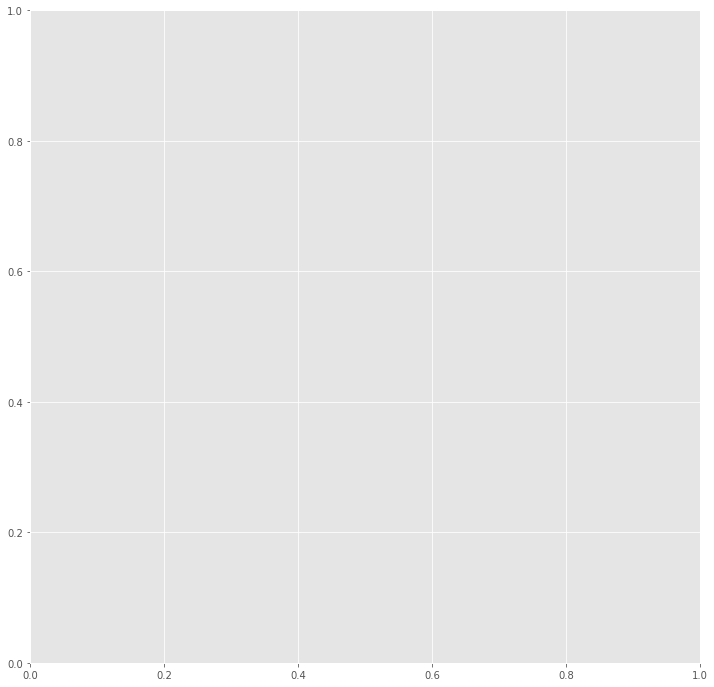

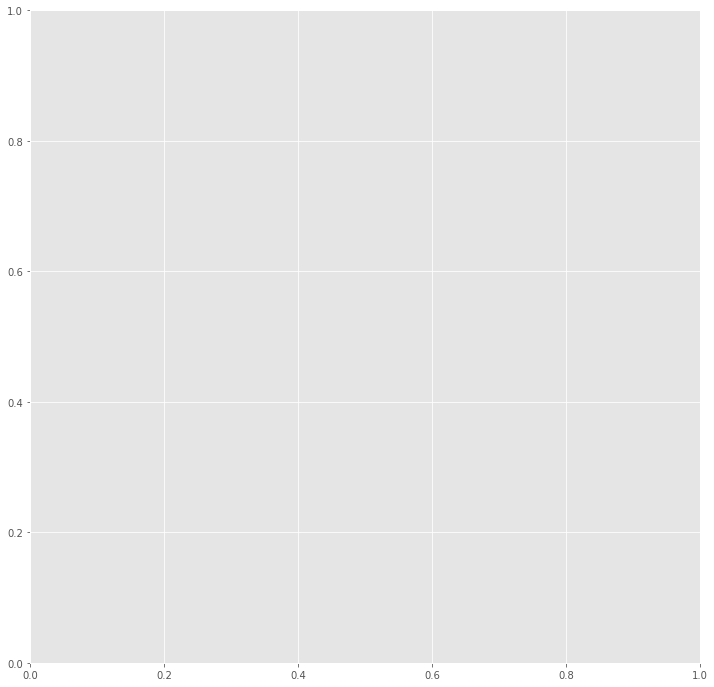

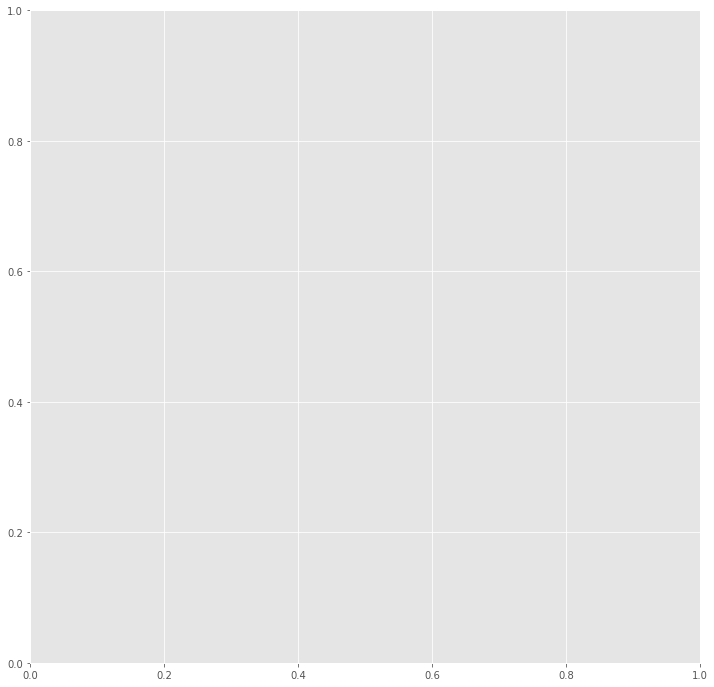

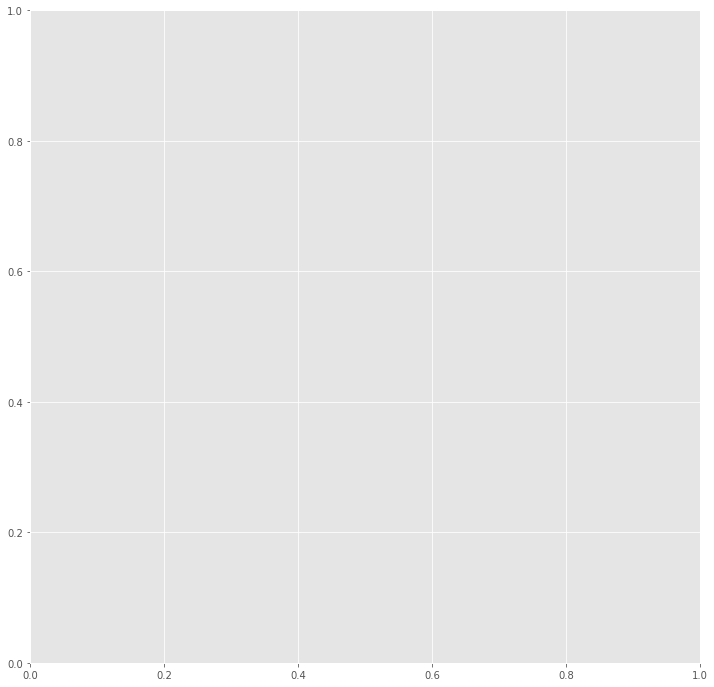

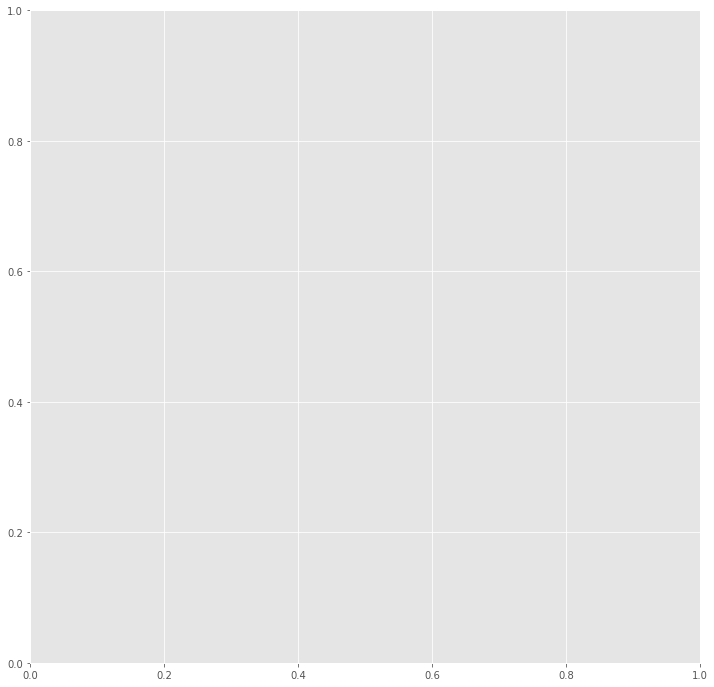

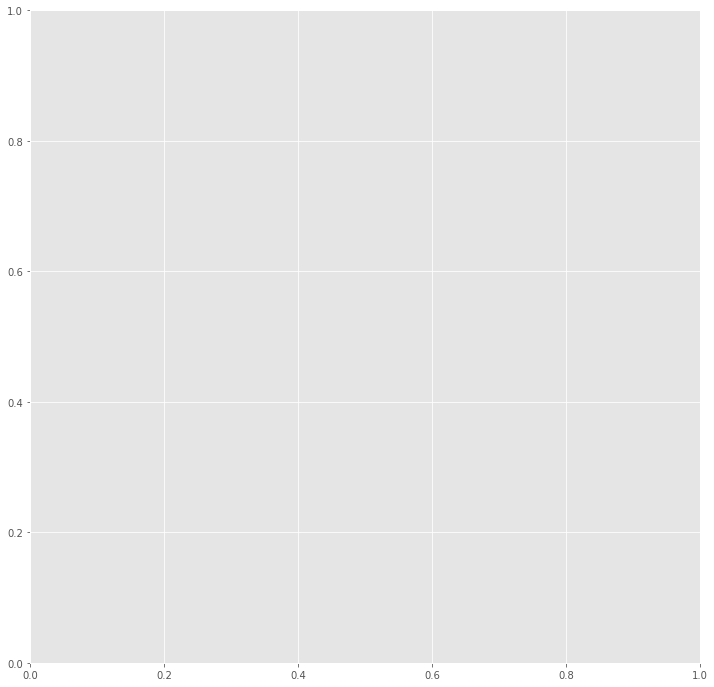

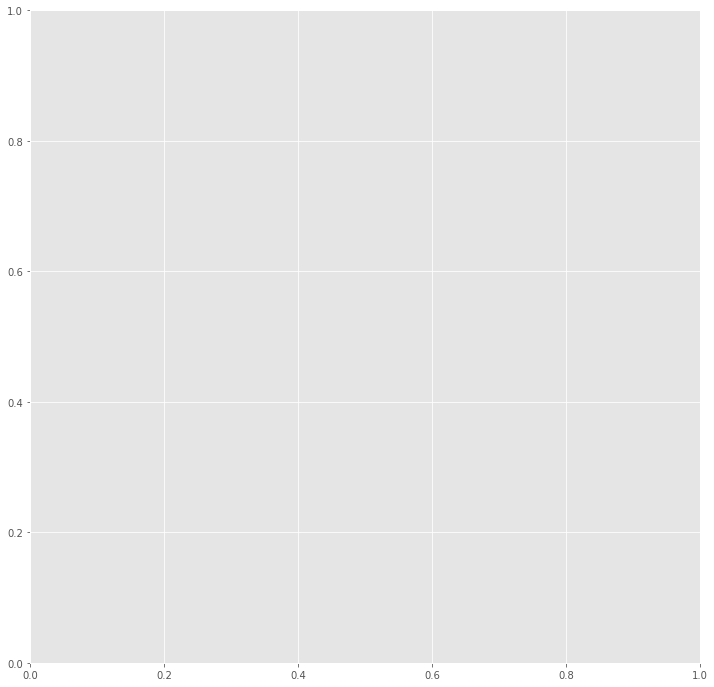

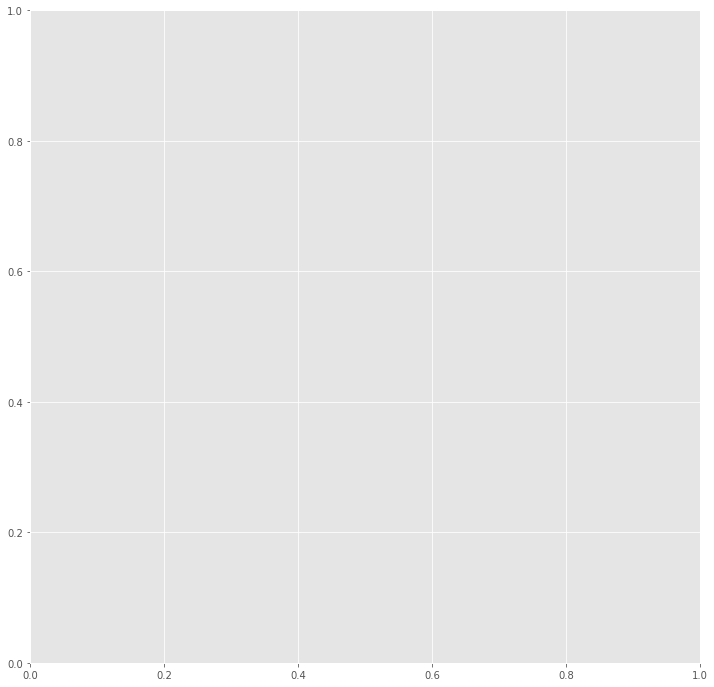

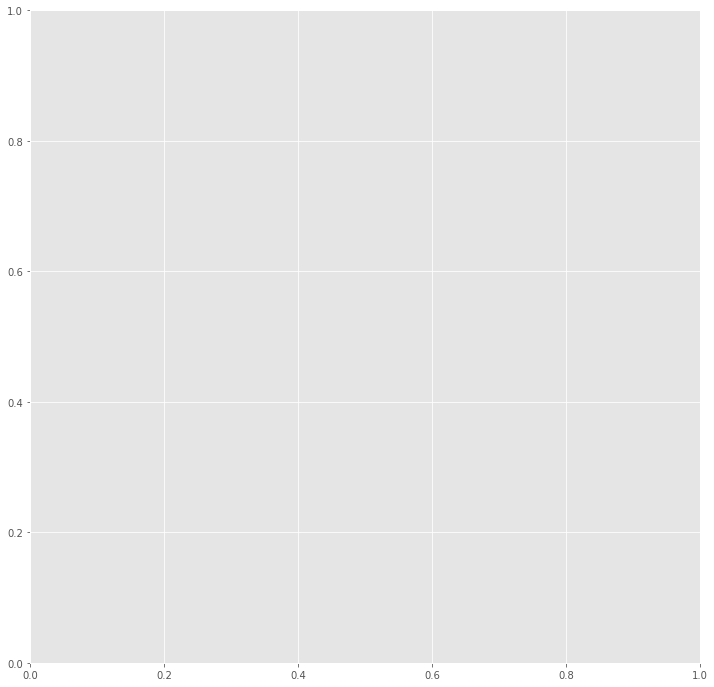

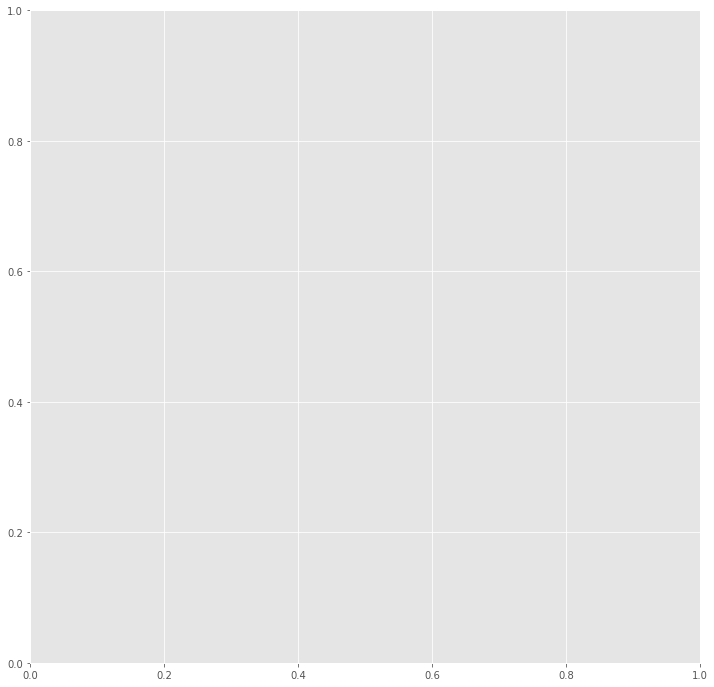

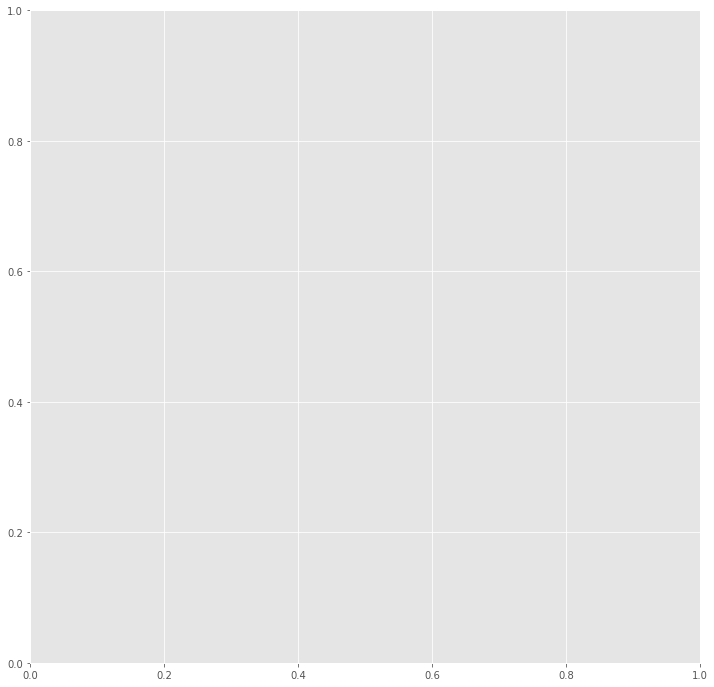

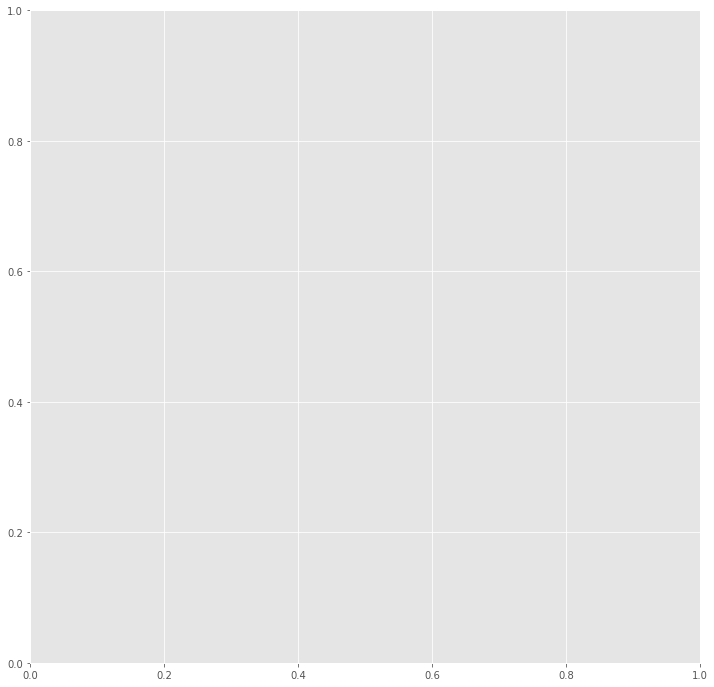

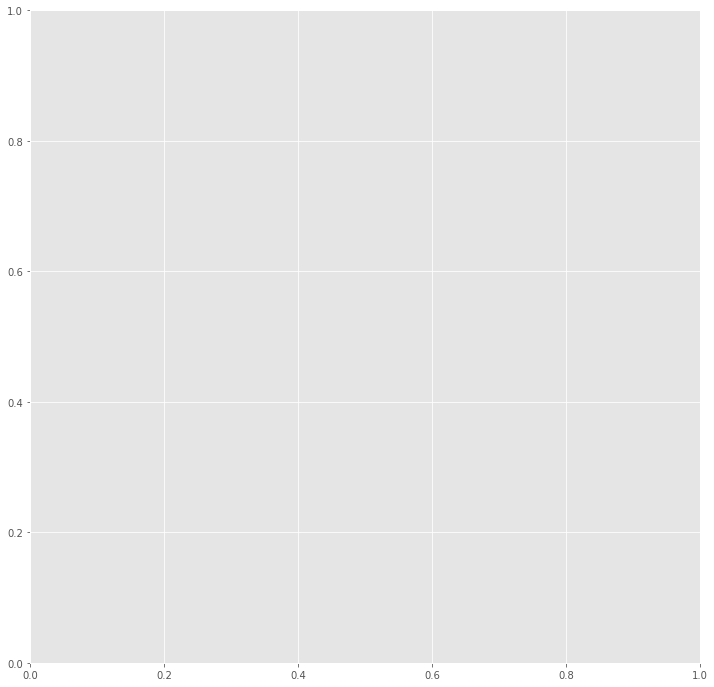

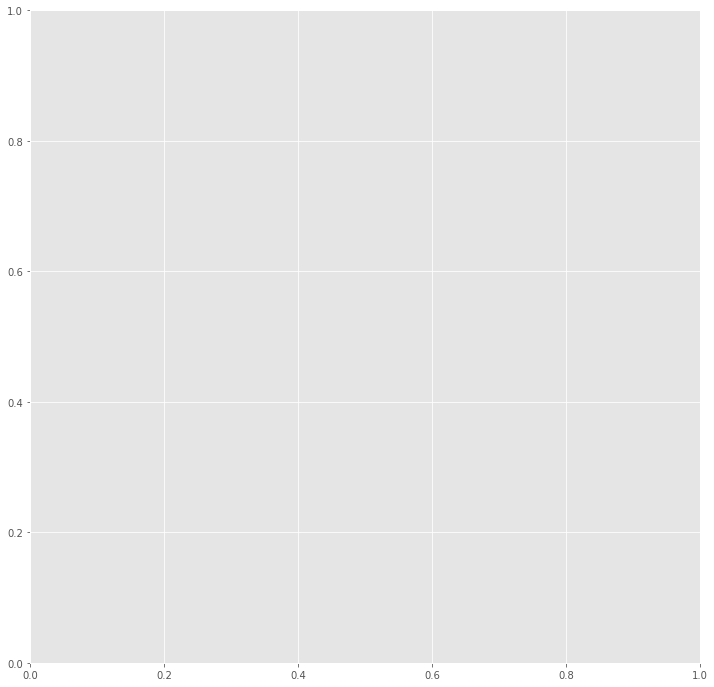

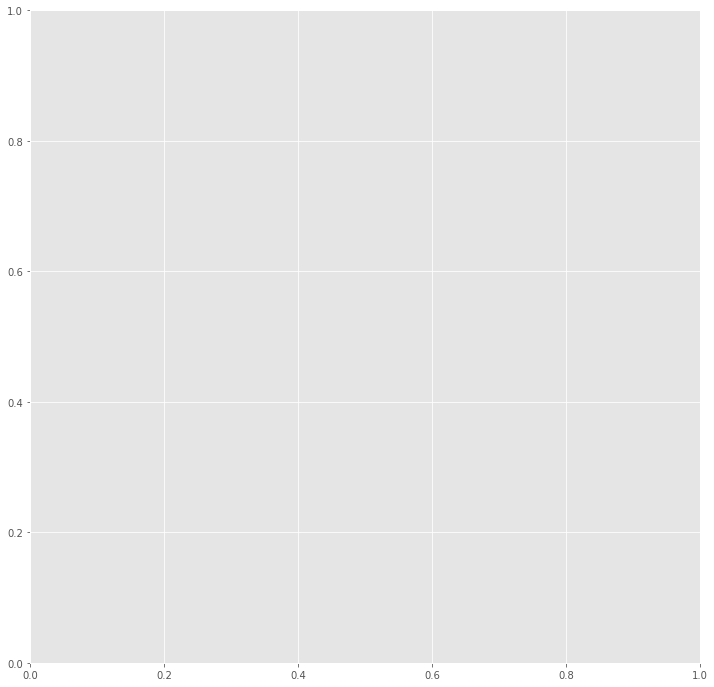

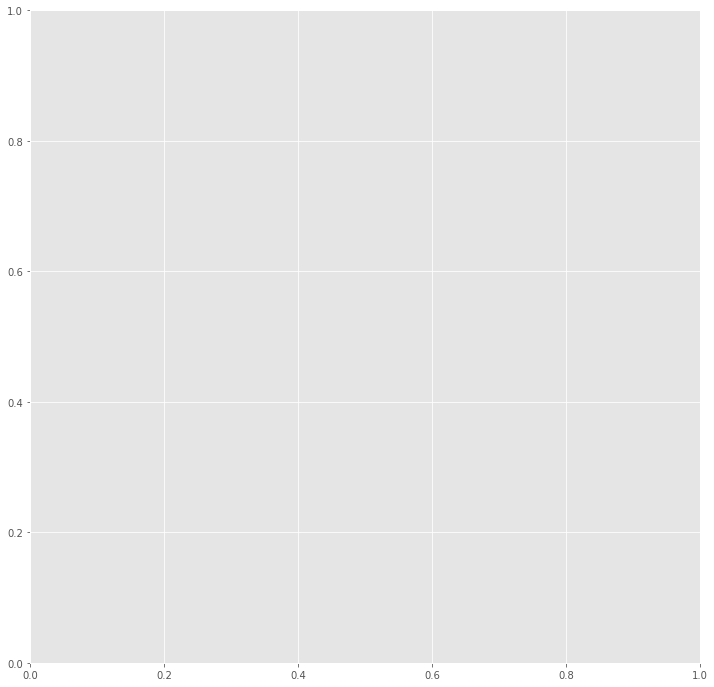

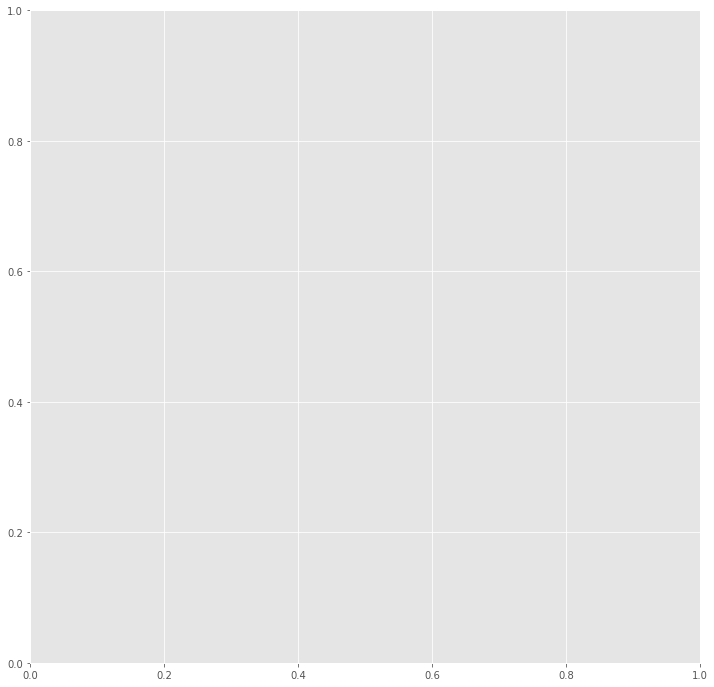

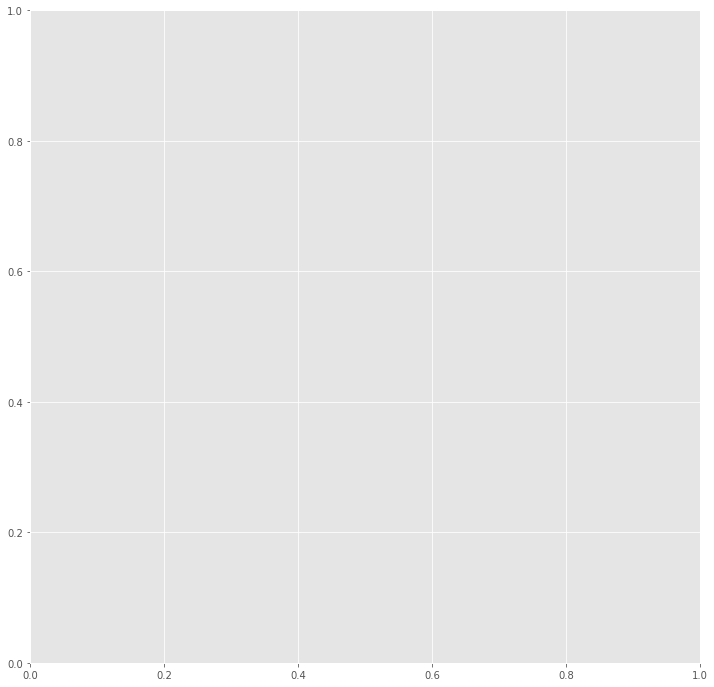

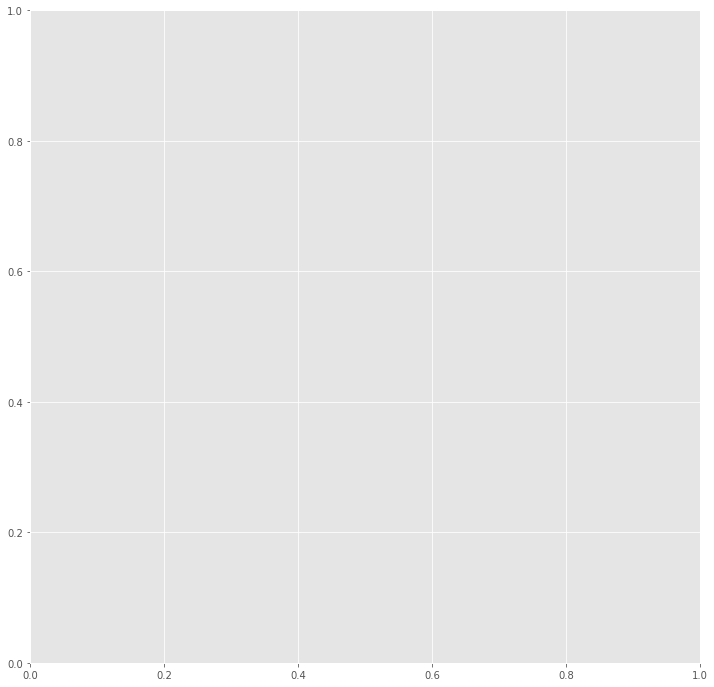

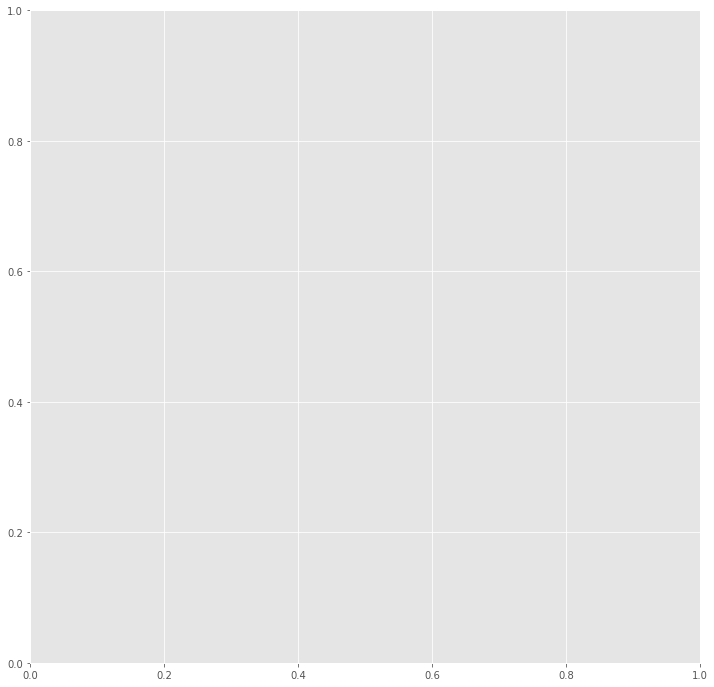

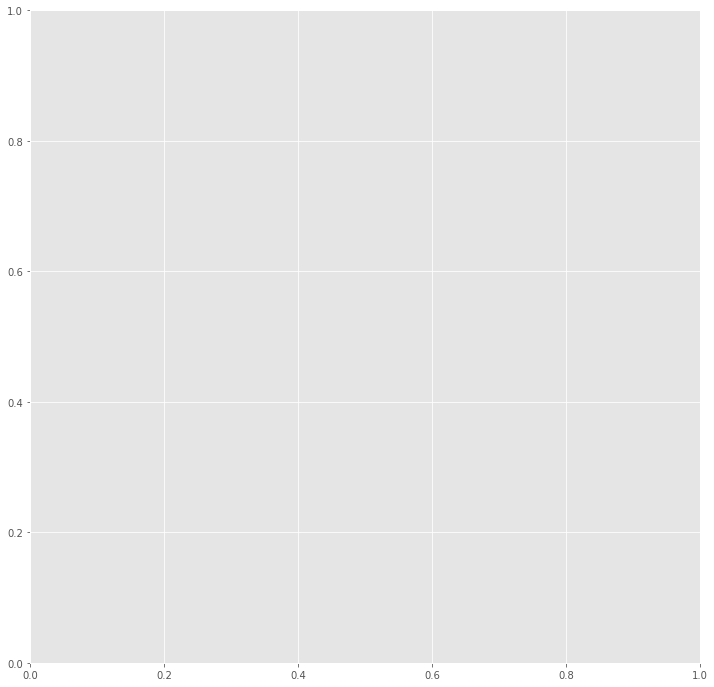

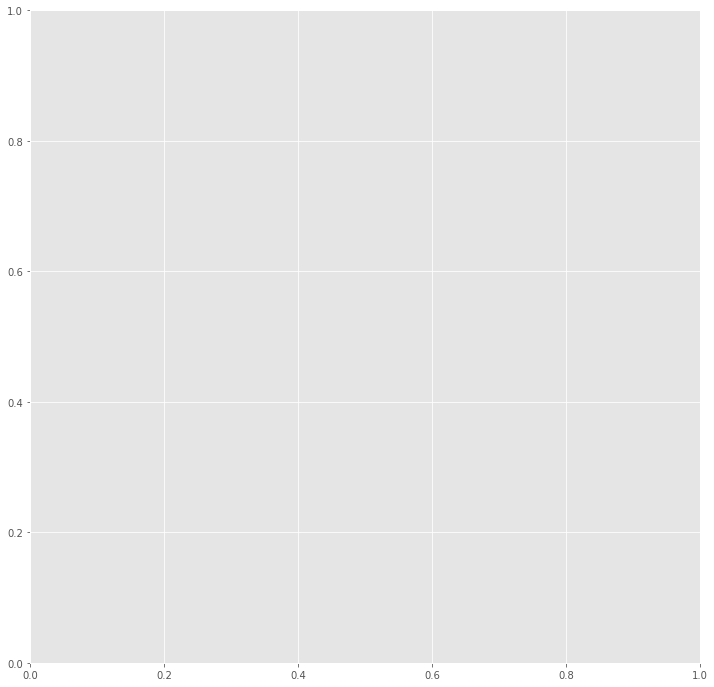

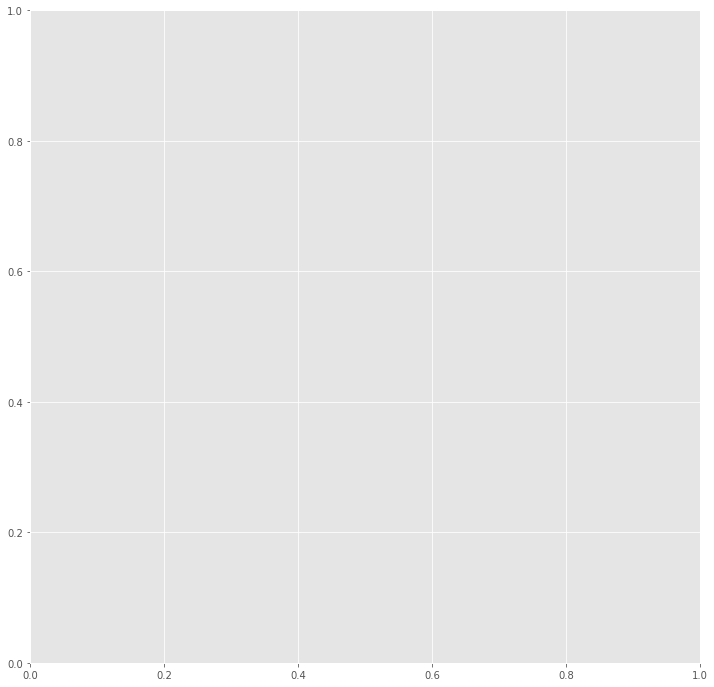

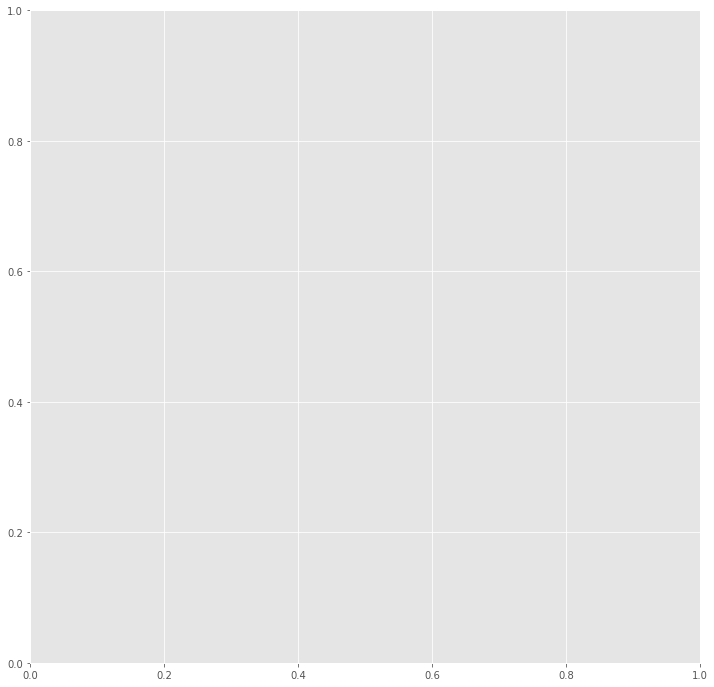

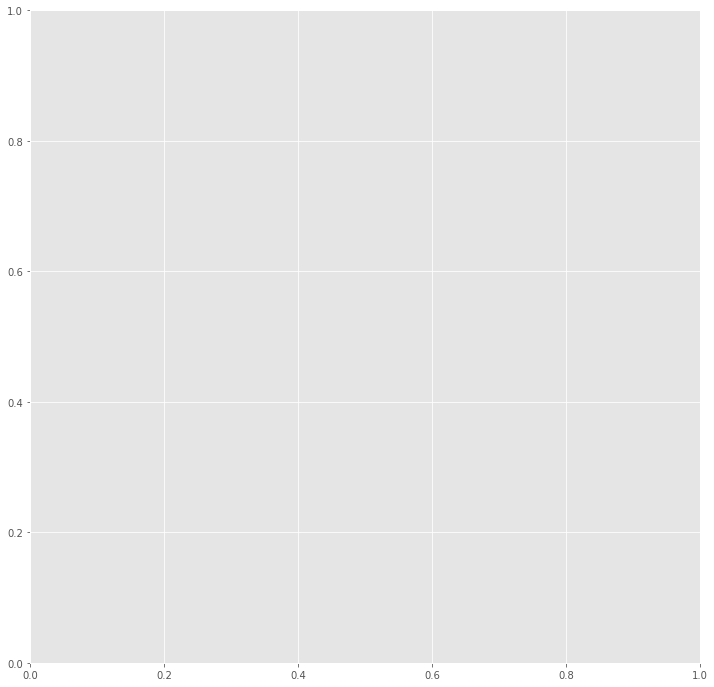

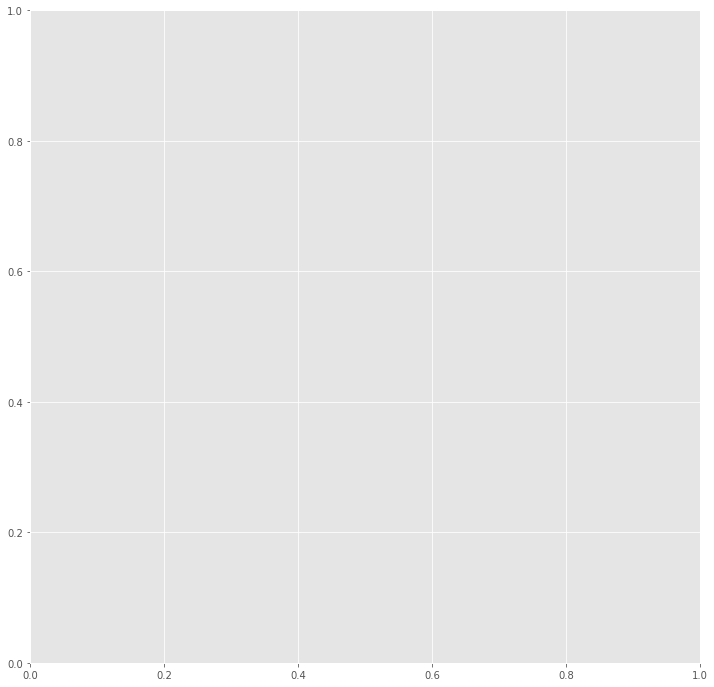

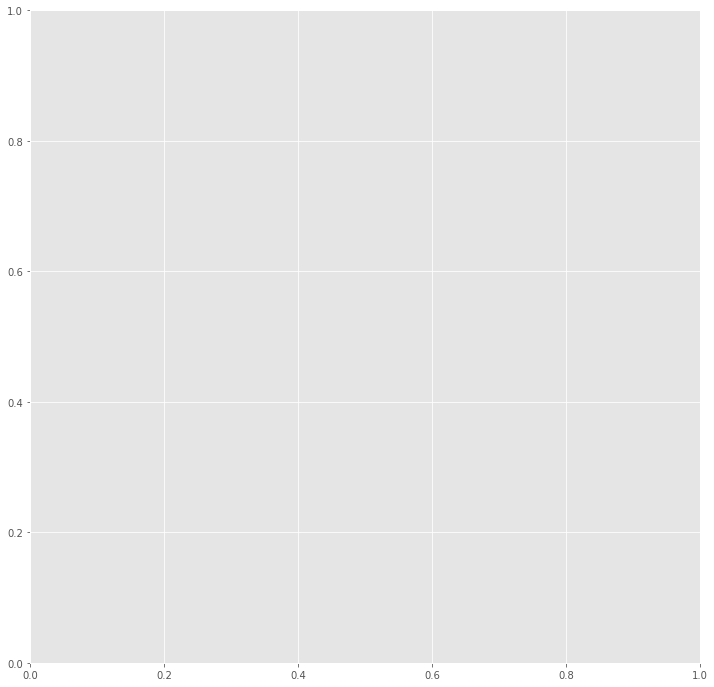

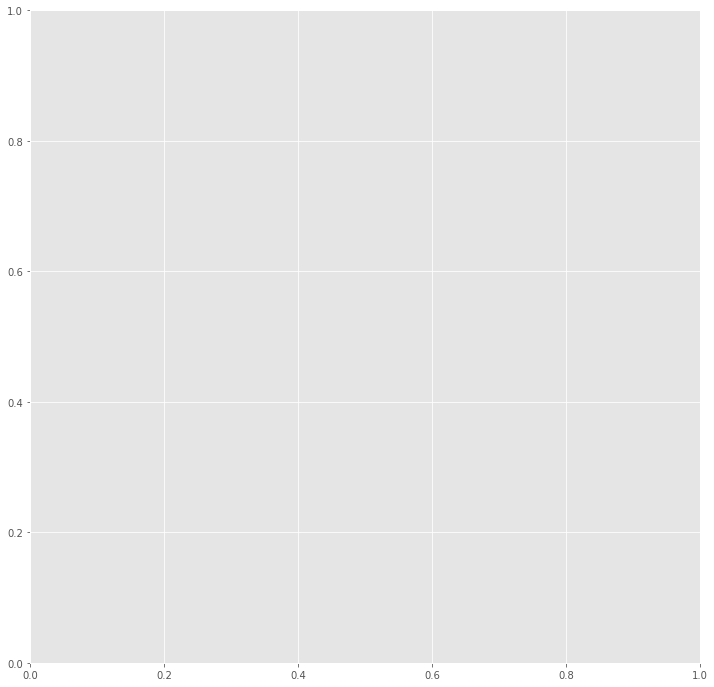

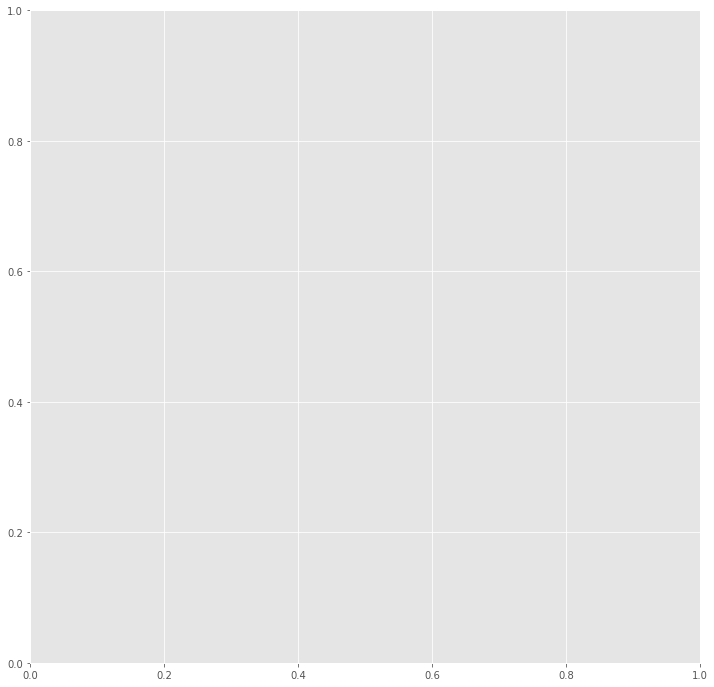

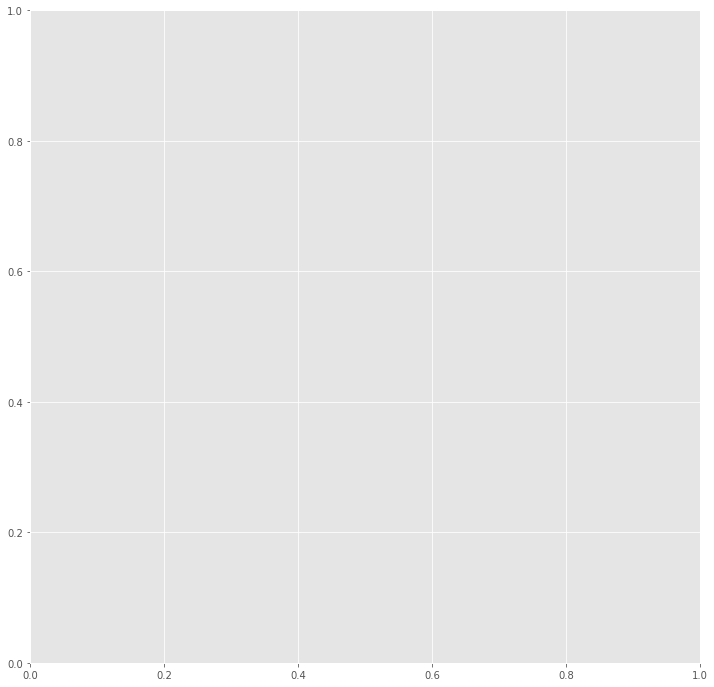

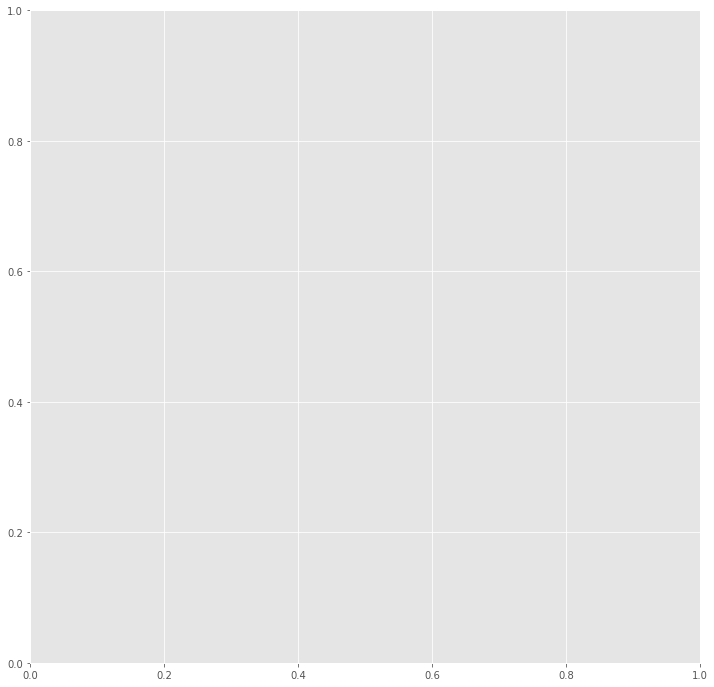

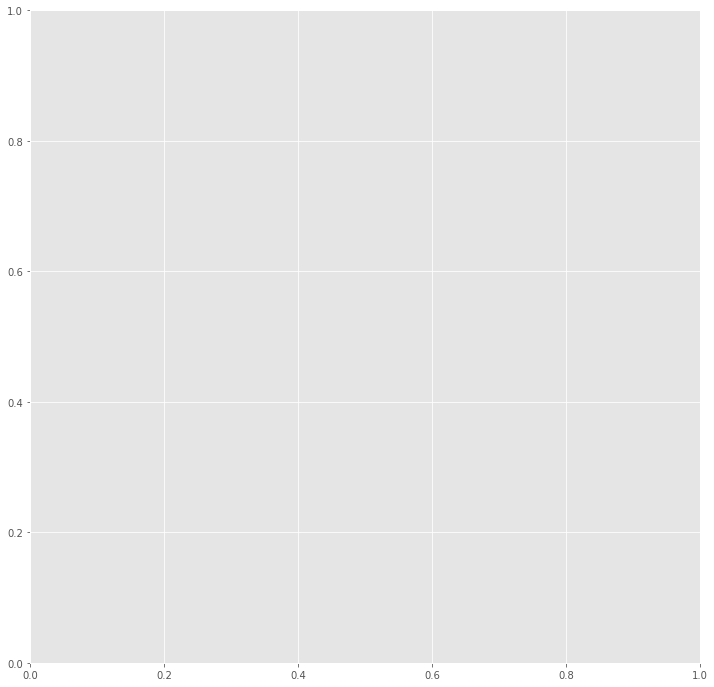

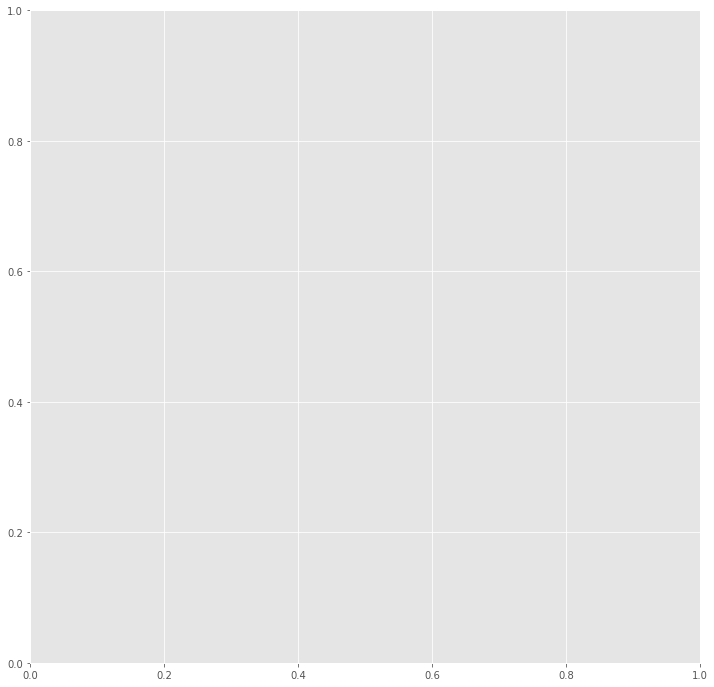

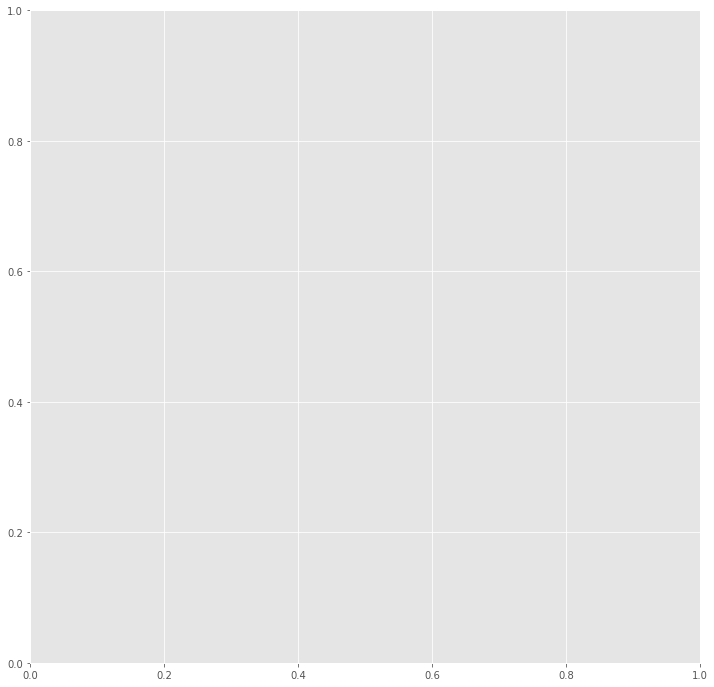

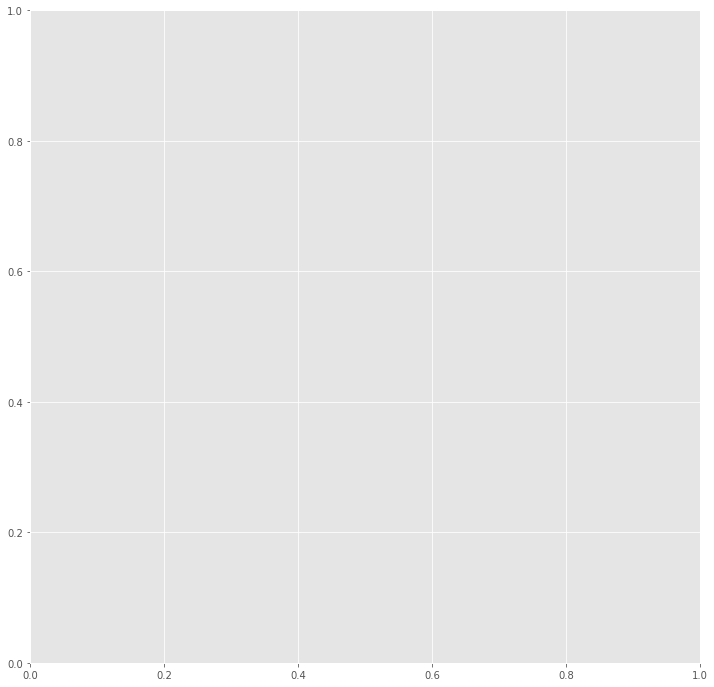

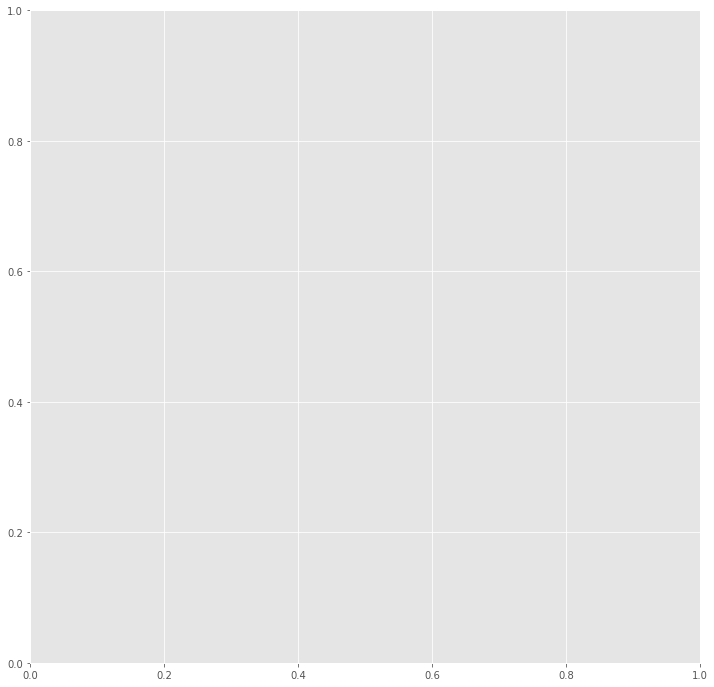

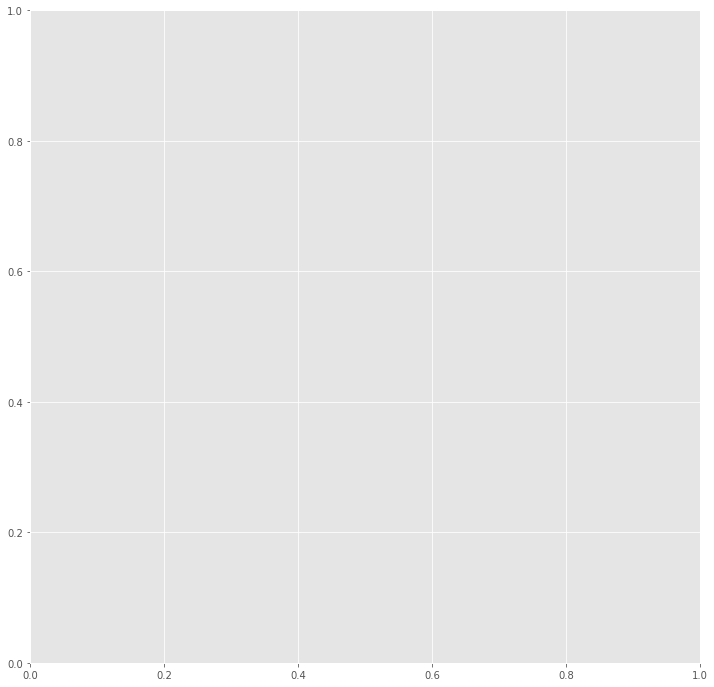

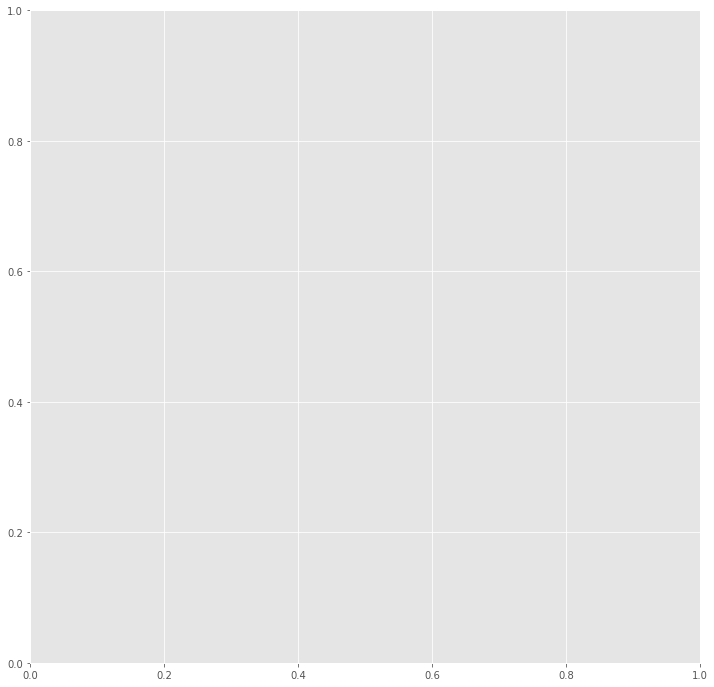

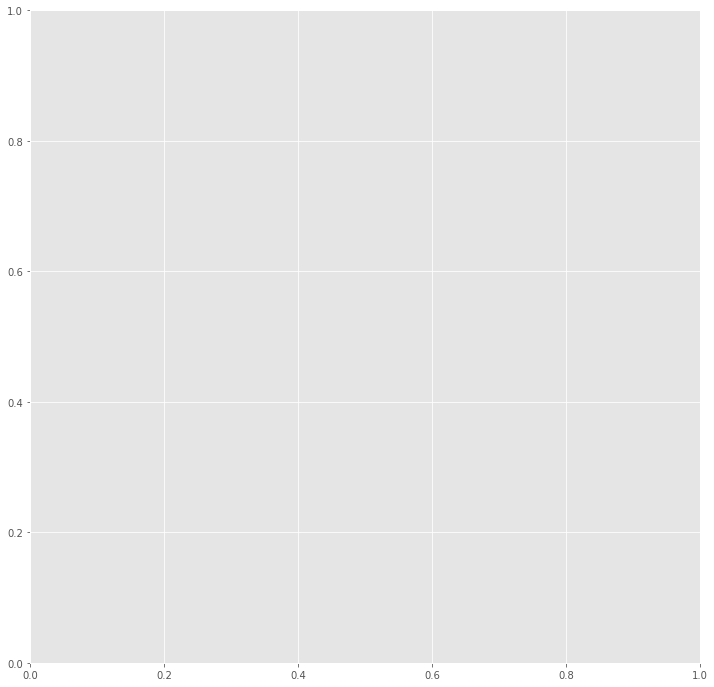

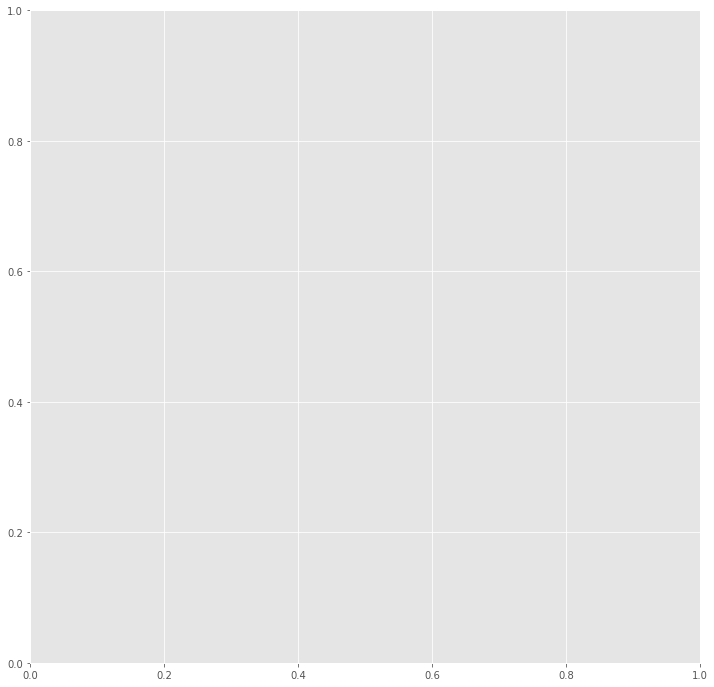

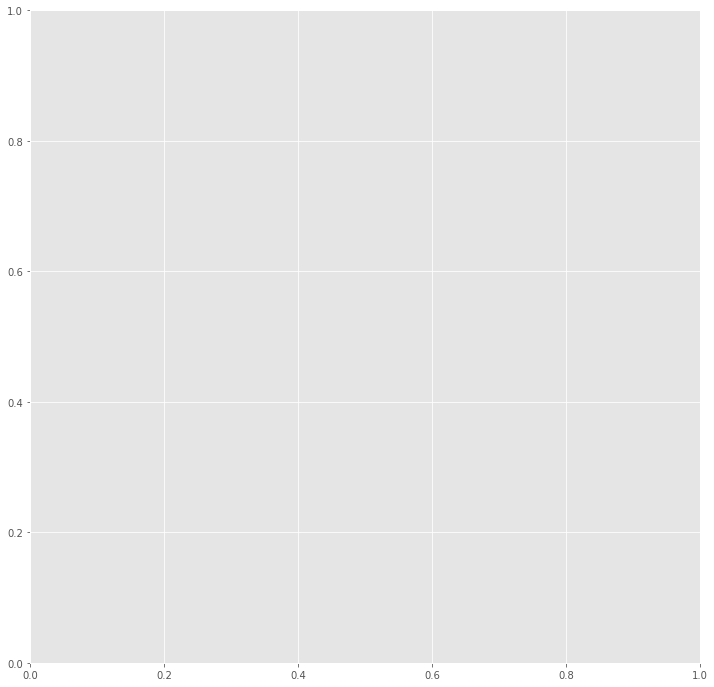

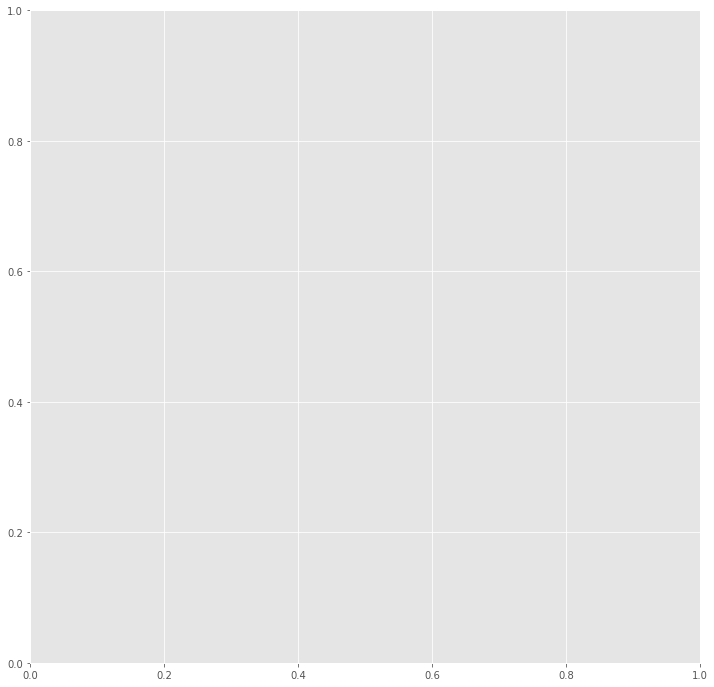

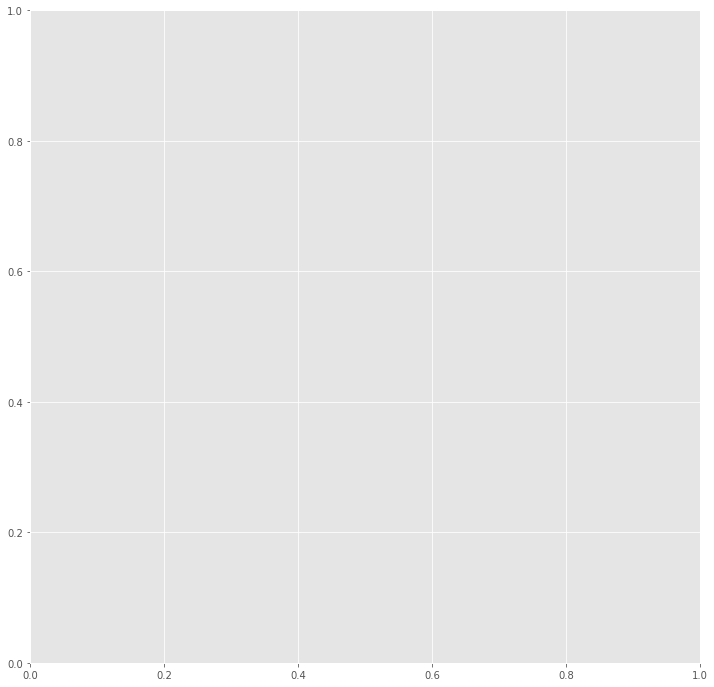

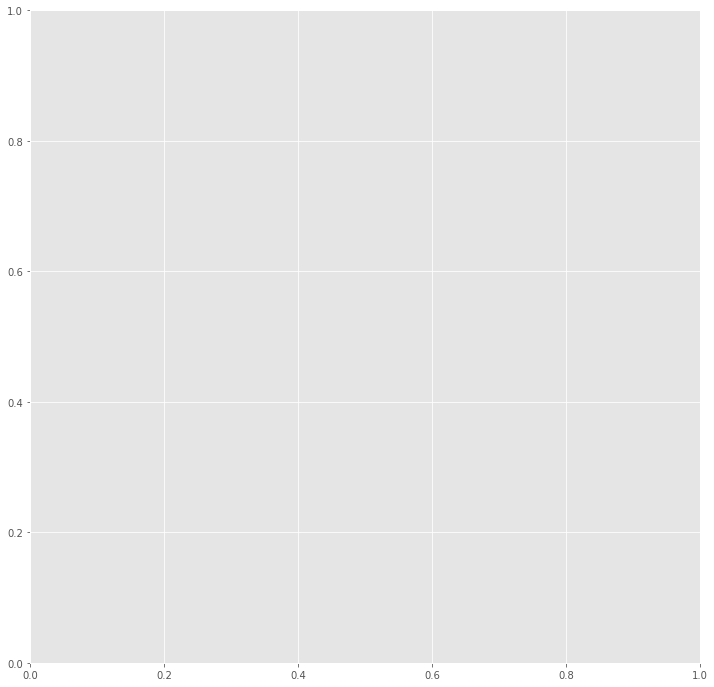

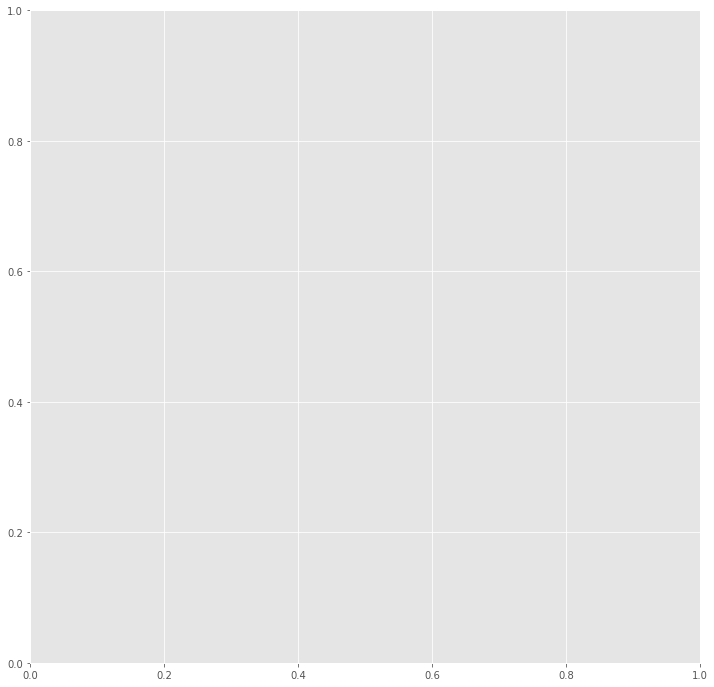

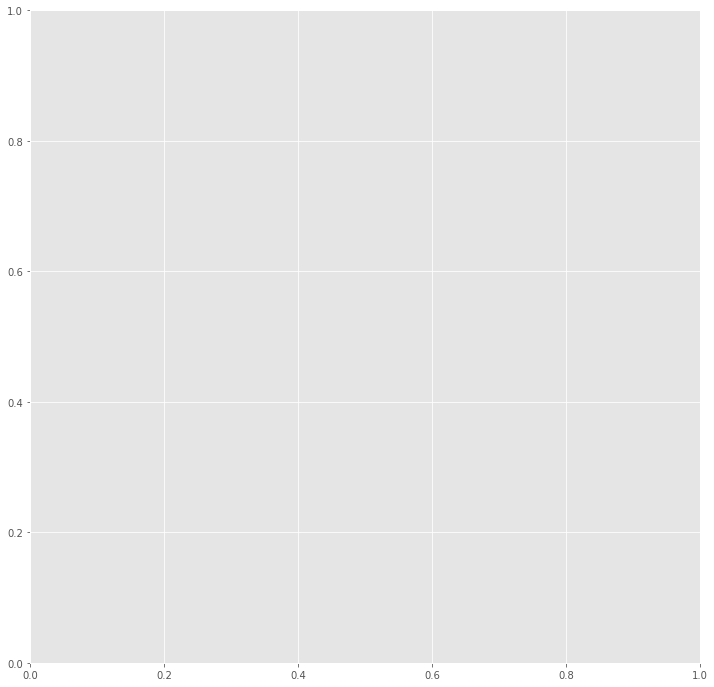

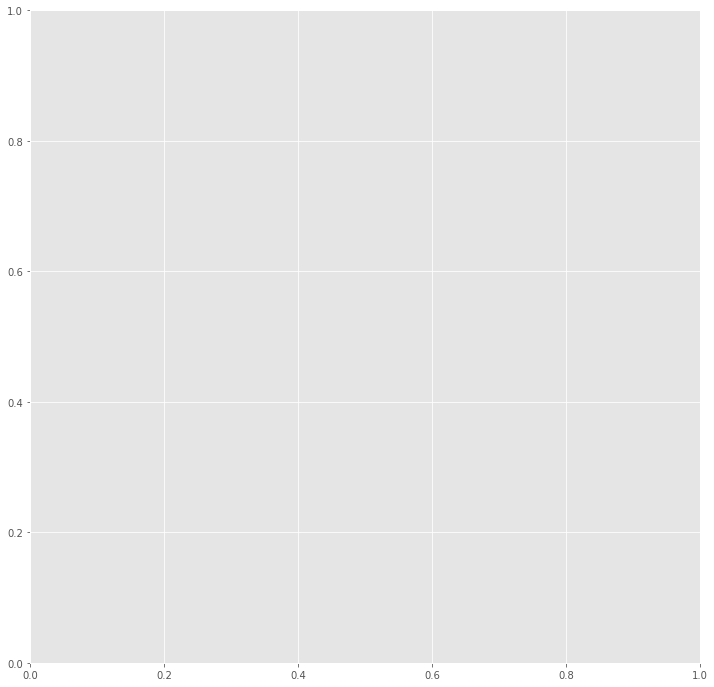

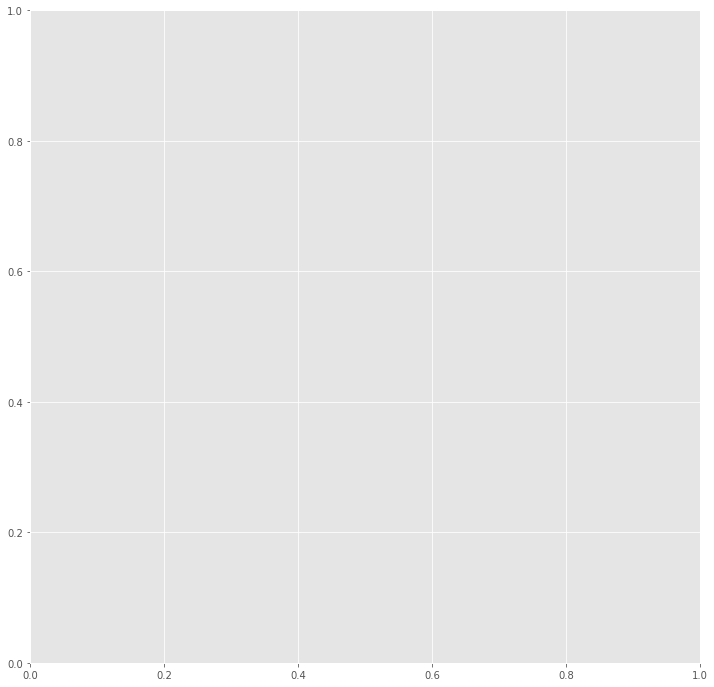

In [ ]:
#new = gg.join(fp,how='inner')
xx = np.linspace(0,1,100)
things = map(lambda p : fullProbFromDF(fitted_sample,gg,p=p),xx)


In [ ]:
new = pd.concate(things,axis=1)

In [ ]:

def plot(df, p):
    #fp = pd.concat([ geoDataframe,fp],axis=0 )
    fig, ax = plt.subplots(1, figsize=(12, 12))
    name = df.column[p]
    ac = new.plot(column=name,cmap=plt.cm.viridis,vmin=0.0,vmax=1.0,legend=True,ax=ax,edgecolor='black')
    fig.suptitle('Independent Joint Model. Probability of presence more than %s'%name)
    plt.show()
    return(None)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider,IntSlider
import ipywidgets as widgets

In [100]:
interact_manual(f, p=FloatSlider(min=0.1,max=0.5,step=0.001,value=0.36),continuous_update=False);

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMzYsIGRlc2NyaXB0aW9uPXUncCcsIG1heD0wLjUsIG1pbj0wLjEsIHN0ZXA9MC4wMDEpLCBCdXR0b24oZGVzY3JpcHTigKY=


# Looking for the inflection point